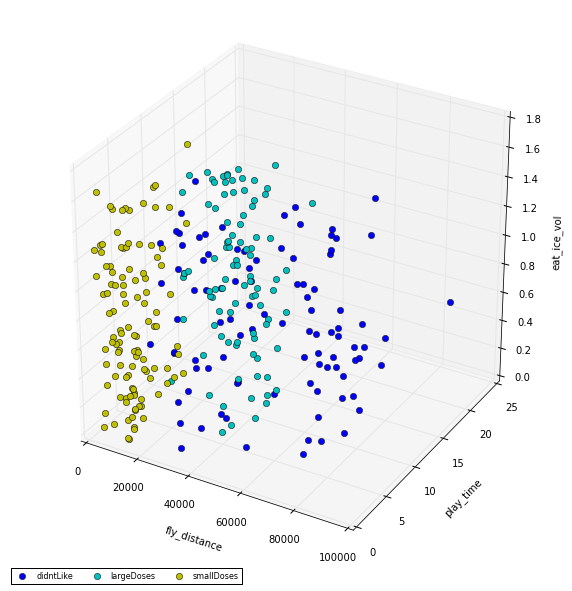

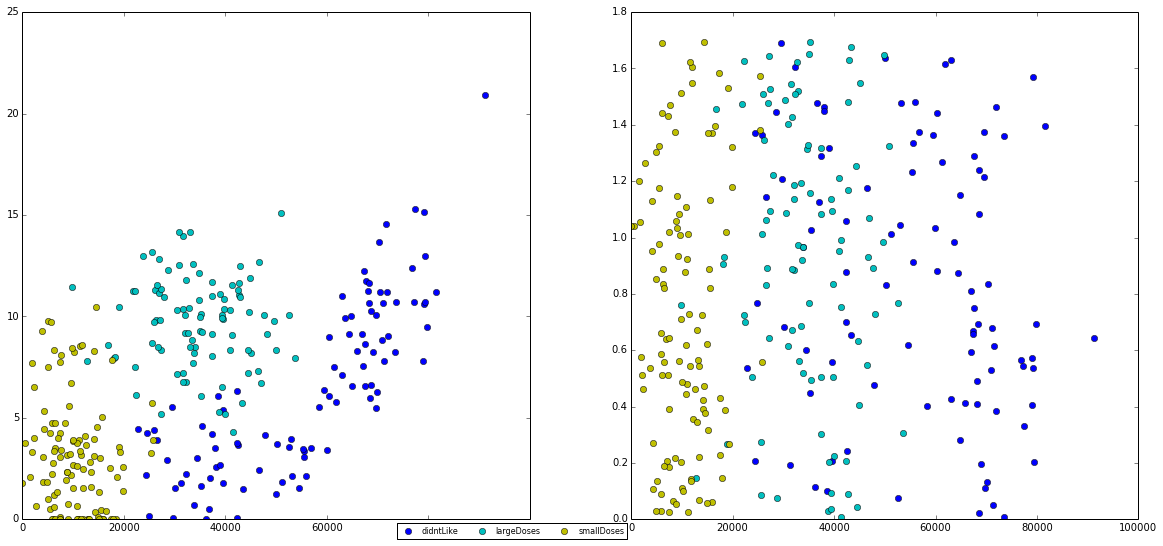

In [83]:
#%reset
# KNN 算法学习

## 数据分析
from pandas import DataFrame
import math 
import numpy as np
import pandas as pd
%matplotlib inline
dataSetFile = "data/Ch02/datingTestSet.txt"
dataSet = pd.read_csv(dataSetFile,sep='\t',header=None,names=['fly_dist','play_time','ice','islike'])
def mark(x):
    flag = 0
    if x == 'largeDoses':
        flag = 3
    elif x == 'smallDoses':
        flag = 2
    elif x == 'didntLike':
        flag = 1
    else:
        flag == 0
    return flag
        
dataSet['flag']=dataSet['islike'].apply(mark)

test = dataSet.sample(100)
train = dataSet.sample(300)

## 散点图
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
plt.figure(figsize=(10,10))
colors=['b', 'c', 'y', 'm', 'r']

## 3个特征对比
ax = plt.subplot(111, projection='3d')
ax.set_xlabel('fly_distance')
ax.set_ylabel('play_time')
ax.set_zlabel('eat_ice_vol')

groups = train.groupby('islike')

i = 0
for name, group in groups:
    ax.plot(group['fly_dist'].tolist(), group['play_time'].tolist(), group['ice'].tolist(),'o', color=colors[i], label=name)
    i=i+1
plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0))
plt.show()

## 2个特征对比
plt.figure(figsize=(20,20))
plt.subplot(221)
i = 0
for name, group in groups:
    plt.plot(group['fly_dist'].tolist(), group['play_time'].tolist(),'o', color=colors[i], label=name)
    i=i+1
plt.subplot(222)
j = 0
for name, group in groups:
    plt.plot(group['fly_dist'].tolist(), group['ice'].tolist(),'o', color=colors[j], label=name)
    j=j+1
plt.legend(loc='best', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0))
plt.show()
    
    
    

In [79]:
## KNN算法
from numpy import *
import operator

## 归一化
def norm(data):
    minData = data.min(0)
    maxData = data.max(0)
    normSet = (data - minData)/(maxData - minData)
    return normSet

def KNNClassify(inx,dataSet,labels,k):    
    dist = (sum((dataSet - inx)**2,axis=1))**0.5
    sortedDistIndicies = dist.argsort()
    flagCount = {}
    for i in range(k):
        flag = labels[sortedDistIndicies[i]]
        flagCount[flag] = flagCount.get(flag,0) + 1
    sortFlags = sorted(flagCount.iteritems(),key=operator.itemgetter(1),reverse=True)
    return sortFlags[0][0]    

test = dataSet.sample(100)
testLabel = array(test.ix[:,-1])
testArray = array(test.ix[:,:-2])

train = dataSet.sample(600)
trainData = array(train.ix[:,:-2])
label = array(train.ix[:,-1])

trainData = norm(trainData)
testNorm = norm(testArray)
k = 10

count = 0
for i,row in enumerate(testNorm):
    flag = KNNClassify(row,trainData,label,k)
    if testLabel[i] != flag:
        count = count +1 
        print('%d->%d'%(testLabel[i],flag))
print(i+1)

1->2
1->2
1->3
1->2
1->2
100
